- 首先，我们导入所需的库和模块，包括numpy、matplotlib以及Scikit-learn中的相关模块。

- 然后，我们使用load_boston函数加载波士顿房屋数据集，并将特征矩阵赋值给X，目标变量赋值给y。

- 数据预处理：我们使用StandardScaler对特征矩阵进行标准化处理，将所有特征缩放到均值为0、方差为1的标准正态分布。

- 划分训练集和测试集：通过调用train_test_split函数，将数据集划分为训练集和测试集，其中测试集占比为20%。

- 定义核函数支持向量机模型：我们使用SVR类来创建一个支持向量机回归模型，指定核函数为高斯径向基核函数（RBF kernel），正则化参数为1.0，松弛变量容忍度为0.1。

- 模型训练：调用模型的fit方法，将训练集的特征矩阵和目标变量作为输入，来训练模型。

- 预测测试集目标变量：通过调用模型的predict方法，传入测试集的特征矩阵，来预测目标变量。

- 评估模型性能：使用mean_squared_error和r2_score函数计算均方误差和决定系数作为模型的性能指标。

- 最后，我们使用scatter和plot函数绘制预测值与真实值的比较图，并添加相关的标签和标题。

https://www.ml-zhuang.club/3812/232/

In [12]:
# 导入所需的库和模块
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [13]:
# 加载波士顿房屋数据集
boston_df = pd.read_csv('./data/1_boston_housing.csv')
# 分离特征和目标变量 
X = boston_df.drop('TARGET', axis=1).values
y = boston_df['TARGET']

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# 定义核函数支持向量机模型
model = SVR(kernel='rbf', C=1.0, epsilon=0.1)

# 模型训练
model.fit(X_train, y_train)

# 预测测试集目标变量
y_pred = model.predict(X_test)

In [15]:
# 评估模型性能
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

均方误差(MSE): 52.83836576796669
决定系数(R^2)： 0.27948125010200286


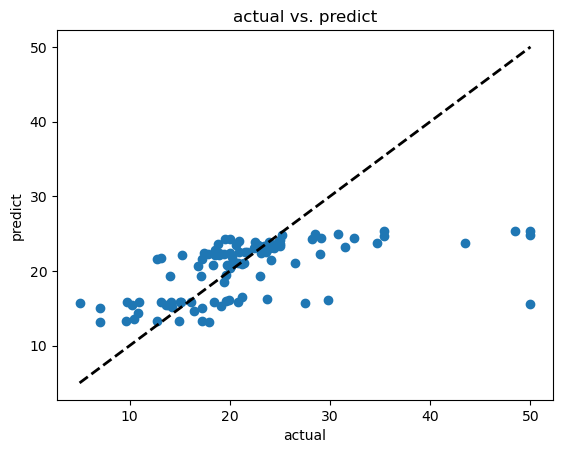

In [16]:
# 打印模型性能指标
print("均方误差(MSE):", mse)
print("决定系数(R^2)：", r2)

# 绘制预测值与真实值的比较图
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('actual')
plt.ylabel('predict')
plt.title('actual vs. predict')
plt.show()